In [26]:
from os import listdir,chdir
import os
from os.path import isfile, join
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')

In [27]:
def split_mod(string,char):
    lst=str(string).split(char)
    lst_mod=[]
    for i in lst:
        if len(i) > 0:
            lst_mod.append(i)
    return(lst_mod)

In [28]:
comp_df=pd.DataFrame(columns=['location', 'date', 'time', 'atm_id', 'card_no', 'txn_no', 'txn_type',
       'from_acc', 'amount', 'avail_bal', 'resp_code', 'resp_desc', 'rrn',
       'type_1', 'type_2', 'type_3', 'type_4', 'fl'])
mypath=r"C:\Users\91866\Desktop\PYTHON_SCRIPTS\IDFC_EJ\IN201010"
files1=[]
for f in listdir(mypath):
    if "(2)"  not in f :
        files1.append(f)
lookup="*TRANSACTION START*"
lookup2="TRANSACTION END"
os.chdir(r'C:\Users\91866\Desktop\PYTHON_SCRIPTS\IDFC_EJ\IN201010')
location=[]
date=[]
time=[]
atm_id=[]
card_no=[]
txn_no=[]
txn_type=[]
amount=[]
from_acc=[]
avail_bal=[]
resp_code=[]
resp_desc=[]
rrn=[]
type_1=[]
type_2=[]
type_3=[]
type_4=[]
type_1_r=[]
type_2_r=[]
type_3_r=[]
type_4_r=[]
fl=[]
for n in np.arange(0,len(files1)):
    print(files1[n])
    start_index=[]
    end_index=[]
    print(files1[n])
    with open(files1[n],"r",encoding="ISO-8859-1") as myFile:
        for num, line in enumerate(myFile):
            if lookup in line:
                start_index.append(num)
            elif lookup2 in line:
                end_index.append(num)
    #print(files1[i],len(start_index),len(end_index))

    if len(start_index)==len(end_index):
        a_file=open(files1[n],"r",encoding="ISO-8859-1")
        content=a_file.readlines()
        for k in np.arange(0,len(start_index)):
            start=start_index[k]
            end=end_index[k]

            record=content[start+1:end+1]
            if len(record) > 0:
                txn_record=[]
                acc_temp='&'
                availbal_temp='&'
                resp_code_temp='&'
                rrn_temp='&'
                resp_desc_ind='&'
                location_temp='&'
                date_temp='&'
                time_temp='&'
                atmid_temp='&'
                card_no_temp='&'
                txn_no_temp='&'
                txn_type_temp='&'
                amount_temp='&'
                resp_desc_temp='&'
                type_1_temp='&'
                type_2_temp='&'
                type_3_temp='&'
                type_4_temp='&'
                type_1_temp_rem='&'
                type_2_temp_rem='&'
                type_3_temp_rem='&'
                type_4_temp_rem='&'
                remaining='&'
                fl_temp=files1[n]

                for line in record:
                    if len(line)>0 and line[0:2]=="  " or "NOTES PRESENTED" in line:
                        txn_record.append(line.strip())
                    elif len(line) > 0 and line.split(" ")[0]=="REMAINING":
                        txn_record.append(line.strip())


                if len(txn_record) > 7 and split_mod(str(txn_record[5])," ")[0].strip()=='WITHDRAWAL':
                    #print("txn record for index ",start,end,txn_record)
                    location_temp=str(txn_record[0]).split(":")[-1]
                    #location.append(location_temp)

                    date_temp=str(txn_record[2]).split(' ')[0]
                    #date.append(date_temp)

                    time_temp=str(txn_record[2]).split(' ')[3]
                    #time.append(time_temp)

                    atmid_temp=str(txn_record[2]).split(' ')[-1]
                    #atm_id.append(atmid_temp)

                    card_no_temp=str(txn_record[3]).split(":")[-1]
                    #card_no.append(card_no_temp)

                    txn_no_temp=str(txn_record[4]).split(" ")[-1]
                    #txn_no.append(txn_no_temp)

                    txn_type_temp=split_mod(str(txn_record[5])," ")[0]
                    #txn_type.append(txn_type_temp)

                    if len(split_mod(str(txn_record[5]),"RS.")) > 1:
                        amount_temp=split_mod(str(txn_record[5]),"RS.")[-1]
                        amount.append(amount_temp)
                    else :
                        amount_temp=0
                        amount.append(amount_temp)

                    for i in np.arange(0,len(txn_record)):
                        if "FROM A/C" in txn_record[i]:
                            acc_temp=split_mod(txn_record[i],":")[-1].strip()
                            #print(acc_temp)
                        elif "AVAIL BAL" in txn_record[i]:
                            availbal_temp=split_mod(txn_record[i],"RS.")[-1].strip()
                            #print(availbal_temp)
                        elif "RESPONSE CODE" in txn_record[i]:
                            resp_code_temp=split_mod(txn_record[i]," ")[-1].strip()
                            resp_desc_ind=i+1
                        elif "RRN" in txn_record[i]:
                            rrn_temp=split_mod(txn_record[i]," ")[-1].strip()
                        elif "NOTES PRESENTED" in txn_record[i]:
                            notes_temp=split_mod(txn_record[i]," ")[-1].strip()
                            type_1_temp,type_2_temp,type_3_temp,type_4_temp=split_mod(notes_temp,",")
                        elif "REMAINING" in txn_record[i]:
                            remain_temp=split_mod(txn_record[i],"REMAINING")[-1]
                            #remain_temp_1=txn_record[i]
                            type_1_temp_rem=remain_temp[7:13]
                            type_2_temp_rem=remain_temp[13:19]
                            type_3_temp_rem=remain_temp[19:25]
                            type_4_temp_rem=remain_temp[25:31]

                            #print(rrn_temp)
            #print(txn_record,resp_desc_ind)
                    if resp_desc_ind!='&' and resp_desc_ind < len(txn_record):
                        if "RRN" not in txn_record[resp_desc_ind]:    
                            #print(resp_desc_ind,len(txn_record))
                            resp_desc_temp=str(txn_record[resp_desc_ind])
                            resp_desc.append(resp_desc_temp)
                        else: 
                            resp_desc_temp=0
                            resp_desc.append(resp_desc_temp)
                    else :
                        resp_desc_temp=0
                        resp_desc.append(resp_desc_temp)

                    if acc_temp!="&" and acc_temp!="FROM A/C":
                        from_acc.append(acc_temp)
                    else : 
                        acc_temp=0
                        from_acc.append(acc_temp)

                    if availbal_temp!="&":
                        avail_bal.append(availbal_temp)
                    else :
                        availbal_temp=0
                        avail_bal.append(availbal_temp)

                    if resp_code_temp!="&":
                        resp_code.append(resp_code_temp)
                    else : 
                        resp_code_temp=0
                        resp_code.append(resp_code_temp)

                    if rrn_temp!="&":
                        rrn.append(rrn_temp)
                    else : 
                        rrn_temp=0
                        rrn.append(rrn_temp)

                    if location_temp!="&":
                        location.append(location_temp)
                    else : 
                        location_temp=0
                        location.append(location_temp)

                    if date_temp!="&":
                        date.append(date_temp)
                    else : 
                        date_temp=0
                        date.append(date_temp)

                    if time_temp!="&":
                        time.append(time_temp)
                    else : 
                        time_temp=0
                        time.append(time_temp)

                    if atmid_temp!="&":
                        atm_id.append(atmid_temp)
                    else : 
                        atmid_temp=0
                        atm_id.append(atmid_temp)

                    if card_no_temp!="&":
                        card_no.append(card_no_temp)
                    else : 
                        card_no_temp=0
                        card_no.append(card_no_temp)

                    if txn_no_temp!="&":
                        txn_no.append(txn_no_temp)
                    else : 
                        txn_no_temp=0
                        txn_no.append(txn_no_temp)

                    if txn_type_temp!="&":
                        txn_type.append(txn_type_temp)
                    else : 
                        txn_type_temp=0
                        txn_type.append(txn_type_temp)

                    if type_1_temp!="&":
                        type_1.append(type_1_temp)
                    else:
                        type_1_temp=0
                        type_1.append(type_1_temp)

                    if type_2_temp!="&":
                        type_2.append(type_2_temp)
                    else:
                        type_2_temp=0
                        type_2.append(type_2_temp)

                    if type_3_temp!="&":
                        type_3.append(type_3_temp)
                    else:
                        type_3_temp=0
                        type_3.append(type_3_temp)

                    if type_4_temp!="&":
                        type_4.append(type_4_temp)
                    else:
                        type_4_temp=0
                        type_4.append(type_4_temp)
                        
                        
                        
                    if type_1_temp_rem!="&" and type_1_temp_rem!='      ':
                        type_1_r.append(int(type_1_temp_rem))
                    else:
                        type_1_temp_rem=0
                        type_1_r.append(type_1_temp_rem)

                    if type_2_temp_rem!="&" and type_1_temp_rem!='      ':
                        type_2_r.append(int(type_2_temp_rem))
                    else:
                        type_2_temp_rem=0
                        type_2_r.append(type_2_temp_rem)

                    if type_3_temp_rem!="&" and type_1_temp_rem!='      ':
                        type_3_r.append(int(type_3_temp_rem))
                    else:
                        type_3_temp_rem=0
                        type_3_r.append(type_3_temp_rem)

                    if type_4_temp_rem!="&" and type_1_temp_rem!='      ' :
                        type_4_r.append(int(type_4_temp_rem))
                    else:
                        type_4_temp_rem=0
                        type_4_r.append(type_4_temp_rem)
                        
                        
                    fl.append(fl_temp)
                    print(fl_temp)
                    #print("extracted values ",location_temp,date_temp,time_temp,atmid_temp,card_no_temp,txn_no_temp,txn_type_temp,amount_temp,acc_temp,availbal_temp,resp_code_temp,rrn_temp)
                    #print(acc_temp,rrn_temp,files1[i])

    else :
        print("not processed",files1[i])
data=pd.DataFrame()
data['location']=location
data['date']=date
data['time']=time
data['atm_id']=atm_id
data['card_no']=card_no
data['txn_no']=txn_no
data['txn_type']=txn_type
data['from_acc']=from_acc
data['amount']=amount
data['avail_bal']=avail_bal
data['resp_code']=resp_code
data['resp_desc']=resp_desc
data['rrn']=rrn
data['type_1']=type_1
data['type_2']=type_2
data['type_3']=type_3
data['type_4']=type_4
data['type_1_rem']=type_1_r
data['type_2_rem']=type_2_r
data['type_3_rem']=type_3_r
data['type_4_rem']=type_4_r
data['fl']=fl
comp_df=comp_df.append(data)

IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_01012020.TXT
IN201010_0

IN201010_02022020.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_02022021.TXT
IN201010_0

IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03022021.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_03032020.TXT
IN201010_0

IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04072020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_04082020.TXT
IN201010_0

IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_06012020.TXT
IN201010_0

IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07022021.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_07032020.TXT
IN201010_0

IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08052020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_08062020.TXT
IN201010_0

IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09072020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09082020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_09092020.TXT
IN201010_0

IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_10122020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_11012020.TXT
IN201010_1

IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022020.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_12022021.TXT
IN201010_1

IN201010_13092020.TXT
IN201010_13092020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13102020.TXT
IN201010_13112020.TXT
IN201010_13112020.TXT
IN201010_13112020.TXT
IN201010_1

IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15022021.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15032020.TXT
IN201010_15042020.TXT
IN201010_15042020.TXT
IN201010_1

IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_16122020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_17012020.TXT
IN201010_1

IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18022021.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_18032020.TXT
IN201010_1

IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19102020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_19112020.TXT
IN201010_1

IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21072020.TXT
IN201010_21082020.TXT
IN201010_21082020.TXT
IN201010_21082020.TXT
IN201010_21082020.TXT
IN201010_21082020.TXT
IN201010_2

IN201010_23062020.TXT
IN201010_23062020.TXT
IN201010_23062020.TXT
IN201010_23062020.TXT
IN201010_23062020.TXT
IN201010_23062020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23072020.TXT
IN201010_23082020.TXT
IN201010_23082020.TXT
IN201010_2

IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25032020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25042020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25052020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_25062020.TXT
IN201010_2

IN201010_27042020.TXT
IN201010_27042020.TXT
IN201010_27042020.TXT
IN201010_27042020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27052020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27062020.TXT
IN201010_27072020.TXT
IN201010_27072020.TXT
IN201010_27072020.TXT
IN201010_2

IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29072020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_29082020.TXT
IN201010_2

In [29]:
comp_df.head()

,amount,atm_id,avail_bal,card_no,date,fl,from_acc,location,resp_code,resp_desc,...,txn_no,txn_type,type_1,type_1_rem,type_2,type_2_rem,type_3,type_3_rem,type_4,type_4_rem
0,500.00,IN201010,2048.50,4357085018346926,01/01/20,IN201010_01012020.TXT,0000016102413000310,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9447,WITHDRAWAL,5,590.0,0,2.0,0,1929.0,0,550.0
1,500.00,IN201010,1571.73,6070936193713846,01/01/20,IN201010_01012020.TXT,0042000101142113,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9448,WITHDRAWAL,5,585.0,0,2.0,0,1929.0,0,550.0
2,100.00,IN201010,6.08,4591570014790736,01/01/20,IN201010_01012020.TXT,*******************,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9449,WITHDRAWAL,1,584.0,0,2.0,0,1929.0,0,550.0
3,6600.00,IN201010,19784.05,4280902027086842,01/01/20,IN201010_01012020.TXT,503010276995,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9450,WITHDRAWAL,1,583.0,0,2.0,1,1928.0,3,547.0
4,8000.00,IN201010,20083.23,4013759036301636,01/01/20,IN201010_01012020.TXT,0000090362010053612,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9451,WITHDRAWAL,5,578.0,0,2.0,3,1925.0,3,544.0


In [30]:
comp_df.shape

(16251, 22)

In [31]:
comp_success=comp_df[comp_df['resp_code']=='000']
comp_success.reset_index(inplace=True)

In [32]:
comp_success.drop(['index'],axis=1,inplace=True)

In [33]:
comp_success.head()

,amount,atm_id,avail_bal,card_no,date,fl,from_acc,location,resp_code,resp_desc,...,txn_no,txn_type,type_1,type_1_rem,type_2,type_2_rem,type_3,type_3_rem,type_4,type_4_rem
0,500.00,IN201010,2048.50,4357085018346926,01/01/20,IN201010_01012020.TXT,0000016102413000310,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9447,WITHDRAWAL,5,590.0,0,2.0,0,1929.0,0,550.0
1,500.00,IN201010,1571.73,6070936193713846,01/01/20,IN201010_01012020.TXT,0042000101142113,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9448,WITHDRAWAL,5,585.0,0,2.0,0,1929.0,0,550.0
2,100.00,IN201010,6.08,4591570014790736,01/01/20,IN201010_01012020.TXT,*******************,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9449,WITHDRAWAL,1,584.0,0,2.0,0,1929.0,0,550.0
3,6600.00,IN201010,19784.05,4280902027086842,01/01/20,IN201010_01012020.TXT,503010276995,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9450,WITHDRAWAL,1,583.0,0,2.0,1,1928.0,3,547.0
4,8000.00,IN201010,20083.23,4013759036301636,01/01/20,IN201010_01012020.TXT,0000090362010053612,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9451,WITHDRAWAL,5,578.0,0,2.0,3,1925.0,3,544.0


In [34]:
comp_success.shape

(14544, 22)

In [35]:
comp_success[comp_success['rrn']=='5105']

,amount,atm_id,avail_bal,card_no,date,fl,from_acc,location,resp_code,resp_desc,...,txn_no,txn_type,type_1,type_1_rem,type_2,type_2_rem,type_3,type_3_rem,type_4,type_4_rem
3863,50000.00,IN201010,76922.73,4016131000335353,07/03/20,IN201010_07032020.TXT,00000010002981962,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,5105,WITHDRAWAL,3,1689.0,1,1446.0,3,1026.0,24,1135.0
12691,15000.00,IN201010,32206.55,401613******4682,25/11/20,IN201010_25112020.TXT,00000010002960237,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,5105,WITHDRAWAL,3,1044.0,1,1801.0,29,2352.0,0,0.0


In [36]:
comp_success.groupby(['txn_no'])

In [37]:
comp_success['date']=pd.to_datetime(comp_success['date'],format="%d/%m/%y")

In [38]:
comp_success=comp_success.sort_values(by='date')

In [39]:
comp_success=comp_success.sort_values(by=['date','time'])

In [40]:
comp_success

,amount,atm_id,avail_bal,card_no,date,fl,from_acc,location,resp_code,resp_desc,...,txn_no,txn_type,type_1,type_1_rem,type_2,type_2_rem,type_3,type_3_rem,type_4,type_4_rem
0,500.00,IN201010,2048.50,4357085018346926,2020-01-01,IN201010_01012020.TXT,0000016102413000310,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9447,WITHDRAWAL,5,590.0,0,2.0,0,1929.0,0,550.0
1,500.00,IN201010,1571.73,6070936193713846,2020-01-01,IN201010_01012020.TXT,0042000101142113,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9448,WITHDRAWAL,5,585.0,0,2.0,0,1929.0,0,550.0
2,100.00,IN201010,6.08,4591570014790736,2020-01-01,IN201010_01012020.TXT,*******************,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9449,WITHDRAWAL,1,584.0,0,2.0,0,1929.0,0,550.0
3,6600.00,IN201010,19784.05,4280902027086842,2020-01-01,IN201010_01012020.TXT,503010276995,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9450,WITHDRAWAL,1,583.0,0,2.0,1,1928.0,3,547.0
4,8000.00,IN201010,20083.23,4013759036301636,2020-01-01,IN201010_01012020.TXT,0000090362010053612,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,9451,WITHDRAWAL,5,578.0,0,2.0,3,1925.0,3,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,1500.00,IN201010,511.29,479932******2697,2021-03-07,IN201010_07032021.TXT,0,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,0090,WITHDRAWAL,3,1083.0,6,622.0,0,67.0,0,0.0
3885,4000.00,IN201010,8006.13,498759******0333,2021-03-07,IN201010_07032021.TXT,0000000053111050124,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,0091,WITHDRAWAL,2,1081.0,19,603.0,0,67.0,0,0.0
3886,3000.00,IN201010,253348.00,401613******4504,2021-03-07,IN201010_07032021.TXT,00000010061055750,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,0092,WITHDRAWAL,2,1079.0,14,589.0,0,67.0,0,0.0
3887,1000.00,IN201010,1062.00,652151******0388,2021-03-07,IN201010_07032021.TXT,36338100017952,BARAKHAMBA ROAD,000,YOUR TXN IS SUCCESSFUL,...,0093,WITHDRAWAL,2,1077.0,4,585.0,0,67.0,0,0.0


In [44]:
from datetime import datetime
from datetime import date, timedelta
sdate=datetime.strptime('01-01-20',"%d-%m-%y").date()
date12=[]
for j in range(0,432):
    day = sdate + timedelta(days=j)
    date12.append(day)
datar_mod=pd.DataFrame()
datar_mod['date']=date12
datar_mod['date']=pd.to_datetime(datar_mod['date'],dayfirst=True)

In [45]:
datar_mod.head()

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


## consolidated data

In [46]:
comp_success['amount']=comp_success['amount'].astype('float')

In [47]:
atm_1=pd.DataFrame(comp_success.groupby(['date'])['amount'].sum())
atm_1.reset_index(inplace=True)

In [48]:
atm_1

,date,amount
0,2020-01-01,535700.0
1,2020-01-02,568400.0
2,2020-01-03,605000.0
3,2020-01-04,239100.0
4,2020-01-05,64500.0
...,...,...
413,2021-03-03,274900.0
414,2021-03-04,469600.0
415,2021-03-05,431800.0
416,2021-03-06,472800.0


In [49]:
df3=pd.merge(datar_mod,atm_1,how='left',on=['date'])

In [50]:
df3.head()

,date,amount
0,2020-01-01,535700.0
1,2020-01-02,568400.0
2,2020-01-03,605000.0
3,2020-01-04,239100.0
4,2020-01-05,64500.0


In [51]:
df3['amount'].mean()

235632.05741626795

In [53]:
df3.replace(np.nan,0,inplace=True)

## GET TICKET OR FAULT DATA

In [40]:
fault=pd.read_csv(r'C:\Users\91866\Desktop\PYTHON_SCRIPTS\Fault_pred.csv')

In [41]:
fault.head()

,S.No,Terminal Name,Ticket Number,Ticket Type,Terminal Location,State,City,Region,Network,Zone,...,Ticket Open Date,Ticket Open Time,Ticket Close Date,Ticket Close Time,Ticket Duration,Docket Number,Last Remarks,Night Start Time,Night End Time,User ID
0,1,IN424410,909244804582,INCIDENT-MSC TEAM,Ground floor Plot no 544 547 P Ajit Emporium...,Gujarat,VAPI,NNNNNN,-,-,...,02-04-2019,12:50:09,-,-,274d 19h 54m 01s,-,CASH OUT-Bank had not allotted the cash in 100...,0:0,23:59,-
1,2,IN412640,909244854078,INCIDENT-FLM_SP,7 1 UG3A 3B 1A UG 1 UG2 UG3 Commerce House Rac...,Madhya Pradesh,Indore,NNNNNN,-,-,...,02-04-2019,12:51:48,-,-,274d 19h 52m 22s,-,CASH OUT-Bank had not allotted the cash in 100...,0:0,23:59,-
2,3,IN801511,909293778832,INCIDENT-FLM_SP,Plot No 79 Residency Road Richmond Town Ban...,Karnataka,Bangalore,SOUTH,-,-,...,02-04-2019,19:10:42,-,-,274d 13h 33m 28s,-,CASH OUT-Bank had not allotted the cash in 100...,0:0,23:59,-
3,4,IN805110,909207134657,INCIDENT-FLM_SP,Ground N Mezz Floor Vankaarath Towers NH B...,Kerala,Kochi,NNNNNN,-,-,...,02-04-2019,19:41:09,-,-,274d 13h 03m 01s,-,CASH OUT-Bank had not allotted the cash in 100...,0:0,23:59,-
4,5,IN424010,909316953586,INCIDENT-FLM_SP,Ground floor Shop No G 2 Milroc Lar Meneze...,Goa,Goa,NNNNNN,-,-,...,03-04-2019,01:08:27,-,-,274d 07h 35m 43s,-,CASH OUT-Bank had not allotted the cash in 100...,0:0,23:59,-


In [42]:
fault_atm=fault[fault['Terminal Name']=='IN201010']

In [43]:
fault_atm=pd.DataFrame(fault_atm.groupby(['Ticket Open Date'])['Ticket Number'].nunique())

In [44]:
fault_atm.reset_index(inplace=True)

In [45]:
temp2

,date,bal_eod,refill,amount
0,2020-01-01,1588700.0,0.0,535700.0
1,2020-01-02,2220300.0,1.0,568400.0
2,2020-01-03,1615300.0,0.0,605000.0
3,2020-01-04,2376200.0,1.0,239100.0
4,2020-01-05,2311700.0,0.0,64500.0
...,...,...,...,...
427,2021-03-03,813800.0,1.0,274900.0
428,2021-03-04,344200.0,0.0,469600.0
429,2021-03-05,912400.0,0.0,431800.0
430,2021-03-06,434600.0,0.0,472800.0


In [46]:
fault_atm.rename(columns={'Ticket Open Date' : 'date'},inplace=True)

In [47]:
fault_atm

,date,Ticket Number
0,01-02-2020,5
1,01-04-2020,8
2,01-06-2020,2
3,01-09-2020,68
4,01-12-2020,5
...,...,...
172,30-12-2019,1
173,31-01-2020,2
174,31-03-2020,12
175,31-08-2020,15


In [48]:
fault_atm['date']=pd.to_datetime(fault_atm['date'])

In [49]:
fault_atm

,date,Ticket Number
0,2020-01-02,5
1,2020-01-04,8
2,2020-01-06,2
3,2020-01-09,68
4,2020-01-12,5
...,...,...
172,2019-12-30,1
173,2020-01-31,2
174,2020-03-31,12
175,2020-08-31,15


In [172]:
temp3=pd.merge(temp2,fault_atm,on='date',how='left')
temp3.replace(np.nan,0,inplace=True)

In [173]:
temp3

,date,bal_eod,refill,amount,Ticket Number
0,2020-01-01,1588700.0,0.0,535700.0,0.0
1,2020-01-02,2220300.0,1.0,568400.0,5.0
2,2020-01-03,1615300.0,0.0,605000.0,0.0
3,2020-01-04,2376200.0,1.0,239100.0,8.0
4,2020-01-05,2311700.0,0.0,64500.0,0.0
...,...,...,...,...,...
427,2021-03-03,813800.0,1.0,274900.0,0.0
428,2021-03-04,344200.0,0.0,469600.0,0.0
429,2021-03-05,912400.0,0.0,431800.0,0.0
430,2021-03-06,434600.0,0.0,472800.0,0.0


In [54]:
data=pd.read_csv(r'C:\Users\91866\Desktop\PYTHON_SCRIPTS\2020.csv')
data['date']=pd.to_datetime(data['date'],format="%m/%d/%Y")
data['hol']=1
data=data[['date','hol']]

In [55]:
temp3=pd.merge(df3,data,on='date',how='left')
temp3.replace(np.nan,0,inplace=True)

In [56]:
temp3

,date,amount,hol
0,2020-01-01,535700.0,1.0
1,2020-01-02,568400.0,1.0
2,2020-01-03,605000.0,0.0
3,2020-01-04,239100.0,0.0
4,2020-01-05,64500.0,0.0
...,...,...,...
427,2021-03-03,274900.0,0.0
428,2021-03-04,469600.0,0.0
429,2021-03-05,431800.0,0.0
430,2021-03-06,472800.0,0.0


In [57]:
def create_time_features_1(df,target=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    #df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    #df['sin_day'] = np.sin(df['dayofyear'])
    #df['cos_day'] = np.cos(df['dayofyear'])
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df.drop(['date'],axis=1)
    if target:
        y = df[target]
        X = X.drop([target],axis=1)
        return X, y
    
    return X

In [58]:
temp3.set_index(['date'],inplace=True)
x=temp3

In [59]:
temp3

,amount,hol
date,,
2020-01-01,535700.0,1.0
2020-01-02,568400.0,1.0
2020-01-03,605000.0,0.0
2020-01-04,239100.0,0.0
2020-01-05,64500.0,0.0
...,...,...
2021-03-03,274900.0,0.0
2021-03-04,469600.0,0.0
2021-03-05,431800.0,0.0


In [60]:
x=create_time_features_1(x,target=None)

In [61]:
temp3

,amount,hol,date,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,
2020-01-01,535700.0,1.0,2020-01-01,2,1,1,2020,1,1,1
2020-01-02,568400.0,1.0,2020-01-02,3,1,1,2020,2,2,1
2020-01-03,605000.0,0.0,2020-01-03,4,1,1,2020,3,3,1
2020-01-04,239100.0,0.0,2020-01-04,5,1,1,2020,4,4,1
2020-01-05,64500.0,0.0,2020-01-05,6,1,1,2020,5,5,1
...,...,...,...,...,...,...,...,...,...,...
2021-03-03,274900.0,0.0,2021-03-03,2,1,3,2021,62,3,9
2021-03-04,469600.0,0.0,2021-03-04,3,1,3,2021,63,4,9
2021-03-05,431800.0,0.0,2021-03-05,4,1,3,2021,64,5,9


In [62]:
temp3.loc[temp3['dayofweek'] <5 , 'Weekday'] = 1
temp3['Weekday']=temp3['Weekday'].fillna(0)

In [63]:
temp3.drop(['date','dayofyear'],axis=1,inplace=True)

In [64]:
temp3.head()

,amount,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,,
2020-01-01,535700.0,1.0,2,1,1,2020,1,1,1.0
2020-01-02,568400.0,1.0,3,1,1,2020,2,1,1.0
2020-01-03,605000.0,0.0,4,1,1,2020,3,1,1.0
2020-01-04,239100.0,0.0,5,1,1,2020,4,1,0.0
2020-01-05,64500.0,0.0,6,1,1,2020,5,1,0.0


## MODEL BUILDING

In [65]:
temp3

,amount,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,,
2020-01-01,535700.0,1.0,2,1,1,2020,1,1,1.0
2020-01-02,568400.0,1.0,3,1,1,2020,2,1,1.0
2020-01-03,605000.0,0.0,4,1,1,2020,3,1,1.0
2020-01-04,239100.0,0.0,5,1,1,2020,4,1,0.0
2020-01-05,64500.0,0.0,6,1,1,2020,5,1,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-03,274900.0,0.0,2,1,3,2021,3,9,1.0
2021-03-04,469600.0,0.0,3,1,3,2021,4,9,1.0
2021-03-05,431800.0,0.0,4,1,3,2021,5,9,1.0


In [66]:
comp_dataset=temp3

In [67]:
## USE THIS DATA FOR TRAINING AND TESTING
comp_dataset

,amount,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,,
2020-01-01,535700.0,1.0,2,1,1,2020,1,1,1.0
2020-01-02,568400.0,1.0,3,1,1,2020,2,1,1.0
2020-01-03,605000.0,0.0,4,1,1,2020,3,1,1.0
2020-01-04,239100.0,0.0,5,1,1,2020,4,1,0.0
2020-01-05,64500.0,0.0,6,1,1,2020,5,1,0.0
...,...,...,...,...,...,...,...,...,...
2021-03-03,274900.0,0.0,2,1,3,2021,3,9,1.0
2021-03-04,469600.0,0.0,3,1,3,2021,4,9,1.0
2021-03-05,431800.0,0.0,4,1,3,2021,5,9,1.0


In [68]:
x=comp_dataset

In [66]:
for i in [ 'dayofweek', 'quarter','month', 'year', 'dayofmonth','weekofyear', 'Weekday']:
    x[i]=x[i].astype('object')

In [70]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2020-01-01 to 2021-03-07
Data columns (total 9 columns):
amount        432 non-null float64
hol           432 non-null float64
dayofweek     432 non-null int64
quarter       432 non-null int64
month         432 non-null int64
year          432 non-null int64
dayofmonth    432 non-null int64
weekofyear    432 non-null int64
Weekday       432 non-null float64
dtypes: float64(3), int64(6)
memory usage: 33.8 KB


In [193]:
x=pd.get_dummies(x,drop_first=True)

In [71]:
X=x.drop(['amount'],axis=1)
Y=x[['amount']]

In [72]:
X.head()

,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,
2020-01-01,1.0,2,1,1,2020,1,1,1.0
2020-01-02,1.0,3,1,1,2020,2,1,1.0
2020-01-03,0.0,4,1,1,2020,3,1,1.0
2020-01-04,0.0,5,1,1,2020,4,1,0.0
2020-01-05,0.0,6,1,1,2020,5,1,0.0


In [73]:
Y.head()

,amount
date,
2020-01-01,535700.0
2020-01-02,568400.0
2020-01-03,605000.0
2020-01-04,239100.0
2020-01-05,64500.0


In [74]:
resultsDict={}
predictionsDict={}

split_date ='2021-02-15'
x_train = X.loc[X.index <= split_date]
x_test = X.loc[X.index > split_date]
print(f"{len(x_train)} days of training data \n {len(x_test)} days of testing data ")

412 days of training data 
 20 days of testing data 


In [81]:
resultsDict={}
predictionsDict={}

split_date ='2021-02-15'
y_train = Y.loc[Y.index <= split_date]
y_test = Y.loc[Y.index > split_date]
print(f"{len(y_train)} days of training data \n {len(y_test)} days of testing data ")

412 days of training data 
 20 days of testing data 


In [82]:
x_train

,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,
2020-01-01,1.0,2,1,1,2020,1,1,1.0
2020-01-02,1.0,3,1,1,2020,2,1,1.0
2020-01-03,0.0,4,1,1,2020,3,1,1.0
2020-01-04,0.0,5,1,1,2020,4,1,0.0
2020-01-05,0.0,6,1,1,2020,5,1,0.0
...,...,...,...,...,...,...,...,...
2021-02-11,0.0,3,1,2,2021,11,6,1.0
2021-02-12,0.0,4,1,2,2021,12,6,1.0
2021-02-13,0.0,5,1,2,2021,13,6,0.0


In [83]:
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)
    error=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return error

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
import xgboost as xgb

In [85]:
models = []
#models.append(('LR', LogisticRegression()))
models.append(('LR', LinearRegression(normalize=True)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('xgb', xgb.XGBRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('abr',AdaBoostRegressor(base_estimator=LinearRegression())))
models.append(('la',Lasso(alpha=1)))

LR {'r2_score': 0.10384574094234145, 'mae': 93996.88837859928, 'mse': 13833108387.077612, 'mape': 69.59586126308952}


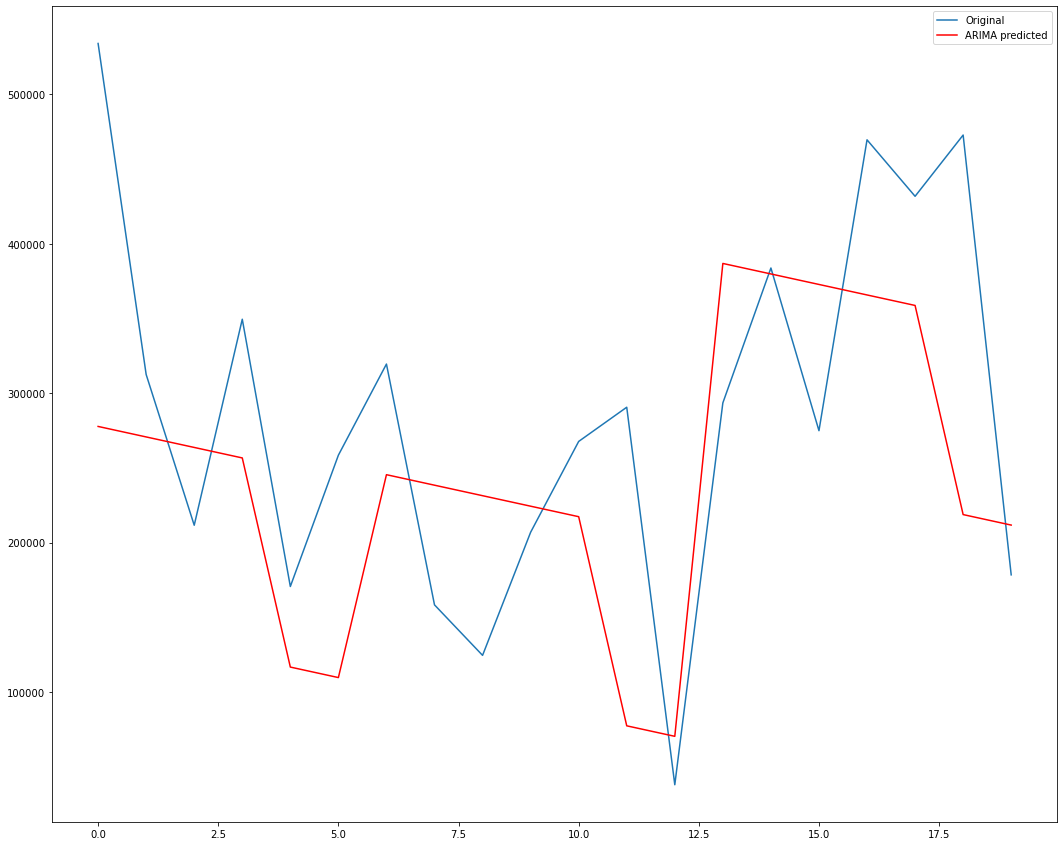

KNN {'r2_score': -3.963238458314496, 'mae': 247725.0, 'mse': 76612943420.0, 'mape': 172.4488970950901}


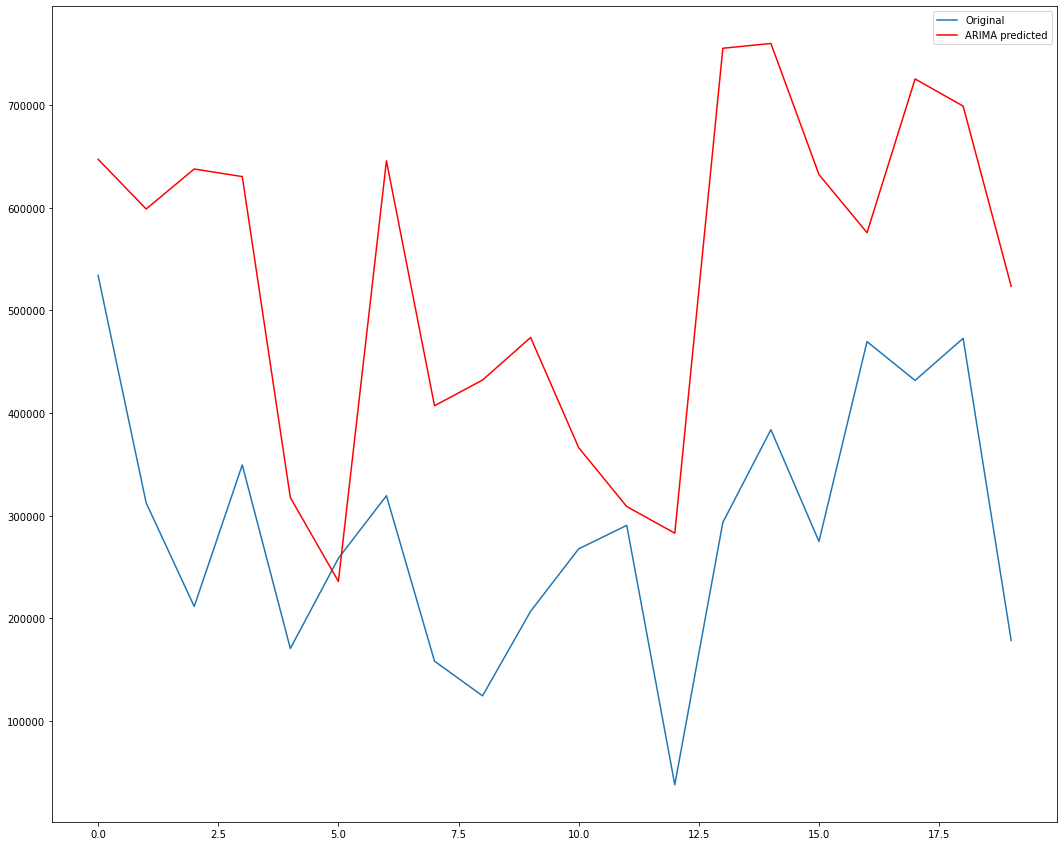

CART {'r2_score': -0.30037740476783625, 'mae': 116190.0, 'mse': 20072729000.0, 'mape': 47.37880530496991}


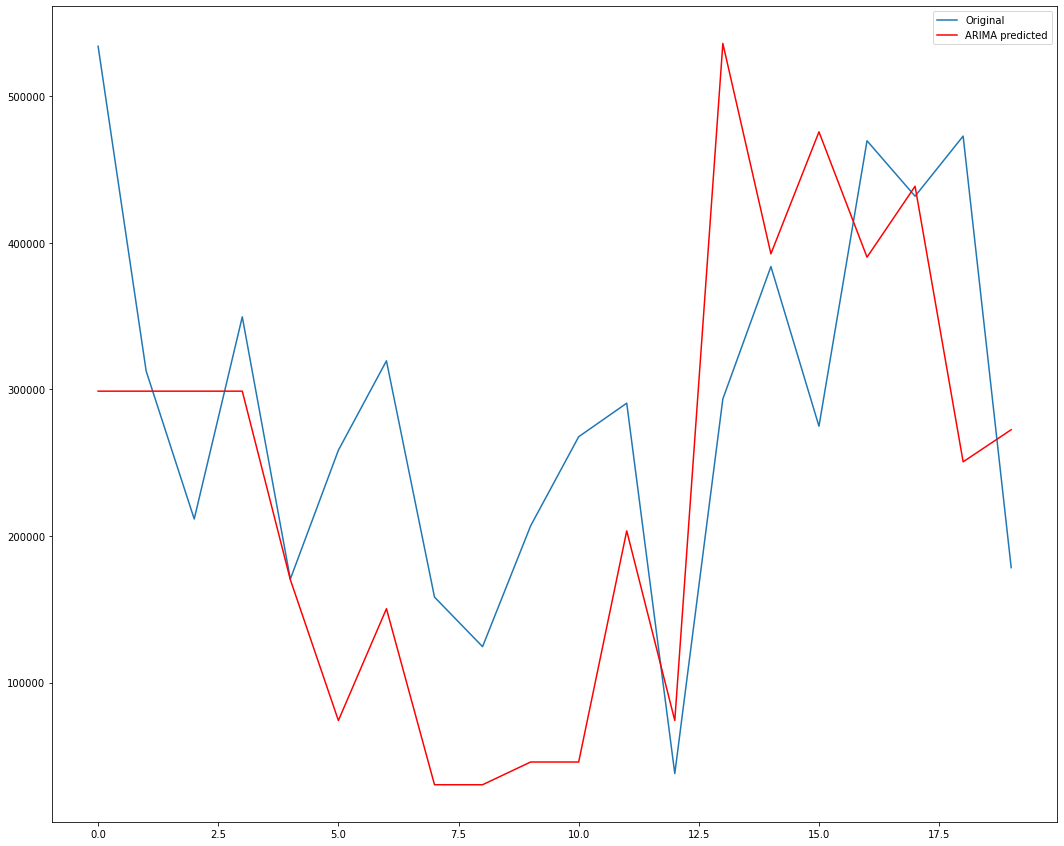

RF {'r2_score': 0.05795036271677667, 'mae': 98308.35, 'mse': 14541553094.05, 'mape': 42.93044125977132}


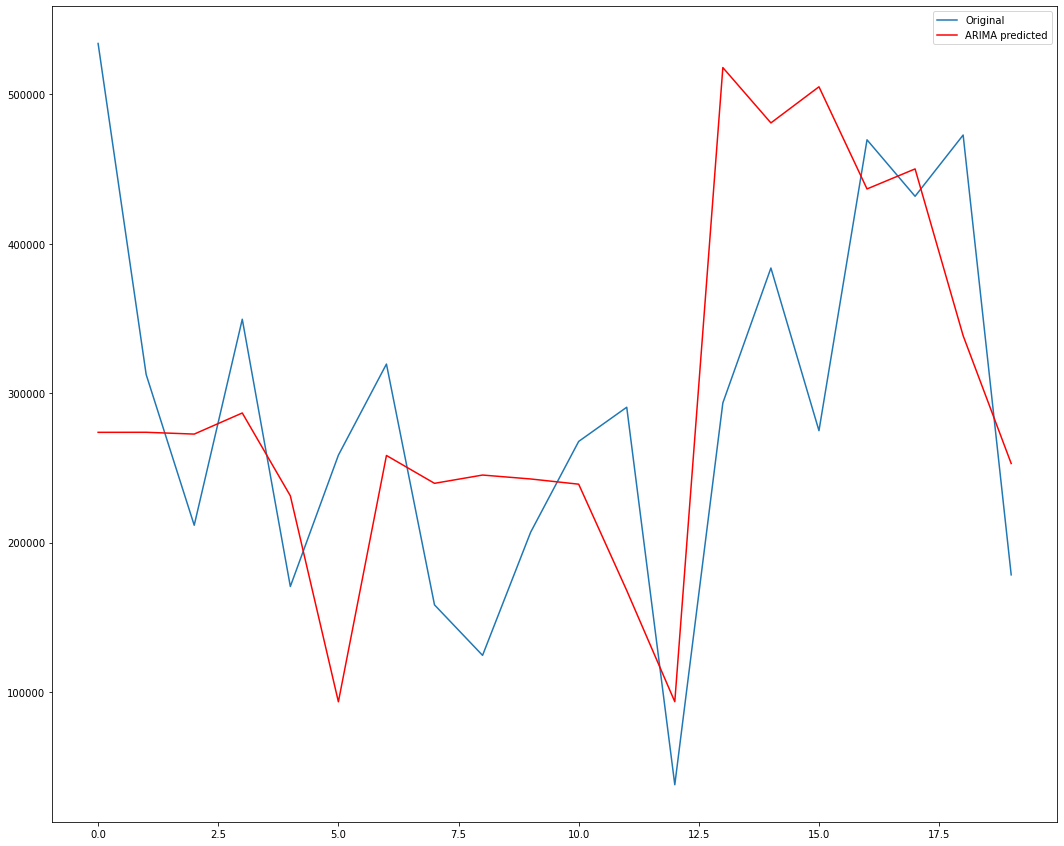

xgb {'r2_score': -0.42855495470193095, 'mae': 120041.58359375, 'mse': 22051287850.897907, 'mape': 54.900312040999545}


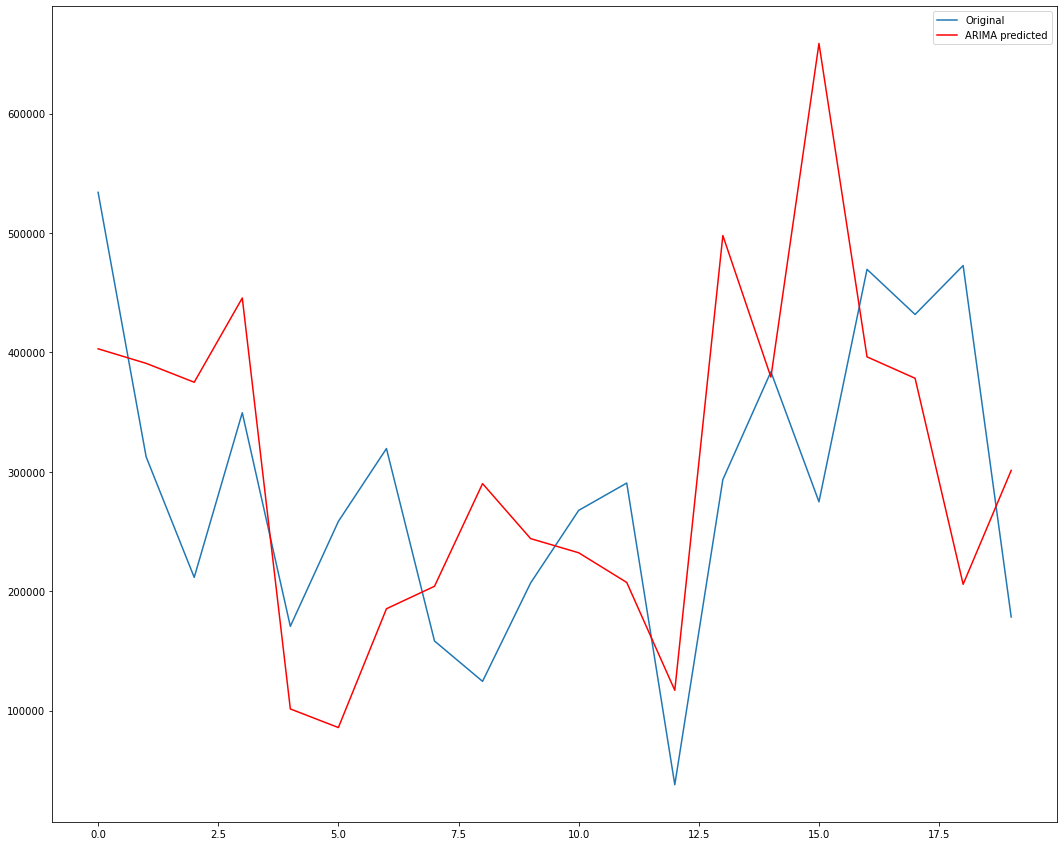

GB {'r2_score': -0.06086569011415022, 'mae': 96629.07342448633, 'mse': 16375607131.424387, 'mape': 34.77755146580957}


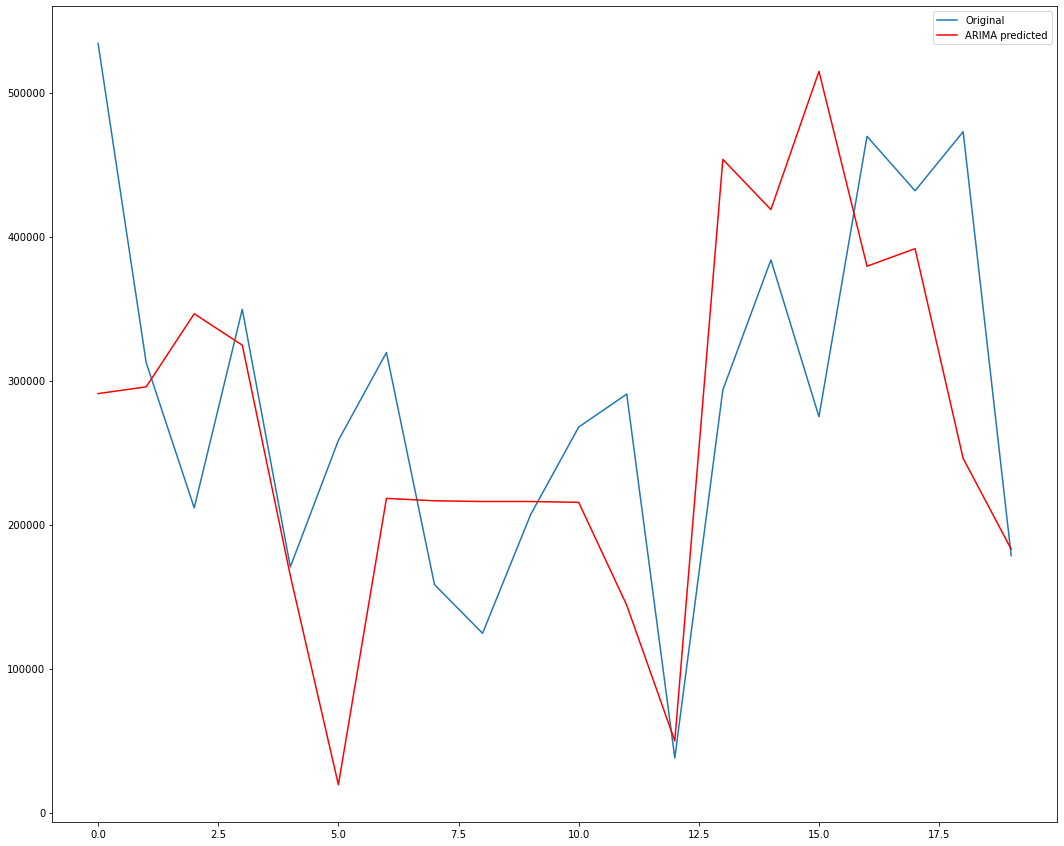

abr {'r2_score': -0.026774843208136723, 'mae': 98734.67238704413, 'mse': 15849378108.360834, 'mape': 38.08137403095887}


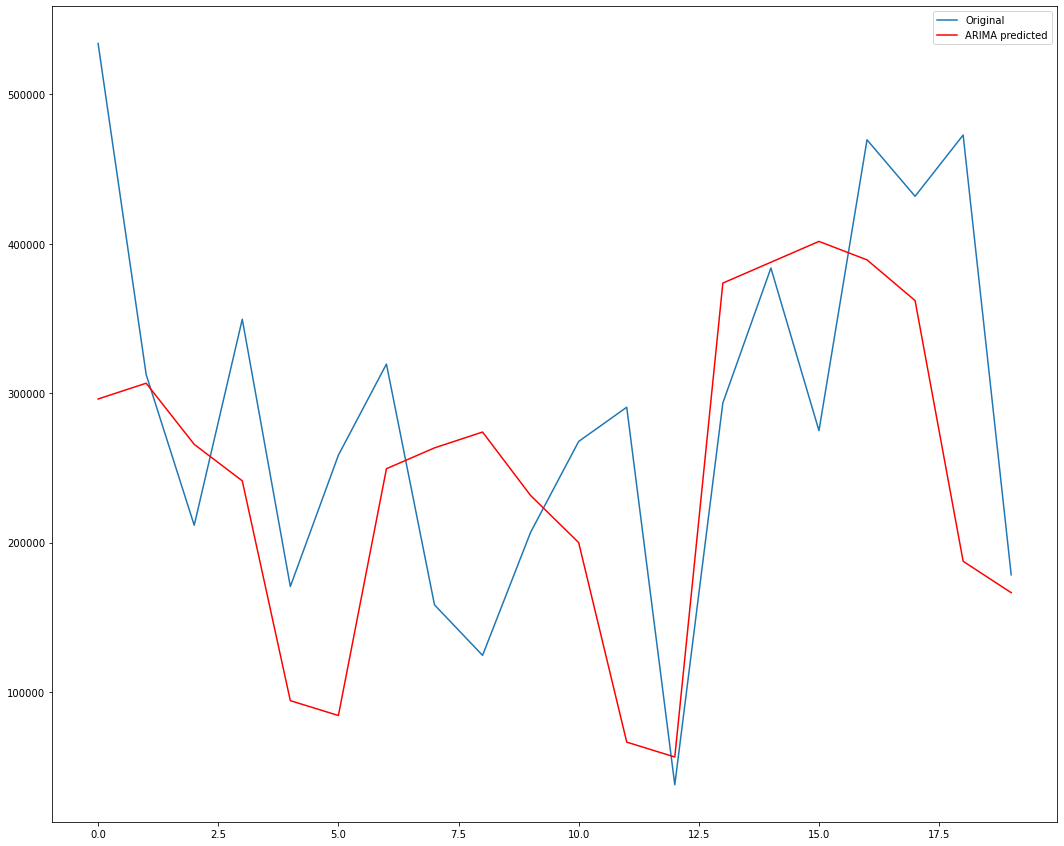

la {'r2_score': 0.10388469857184468, 'mae': 93995.82568797767, 'mse': 13832507034.011469, 'mape': 36.372629217145004}


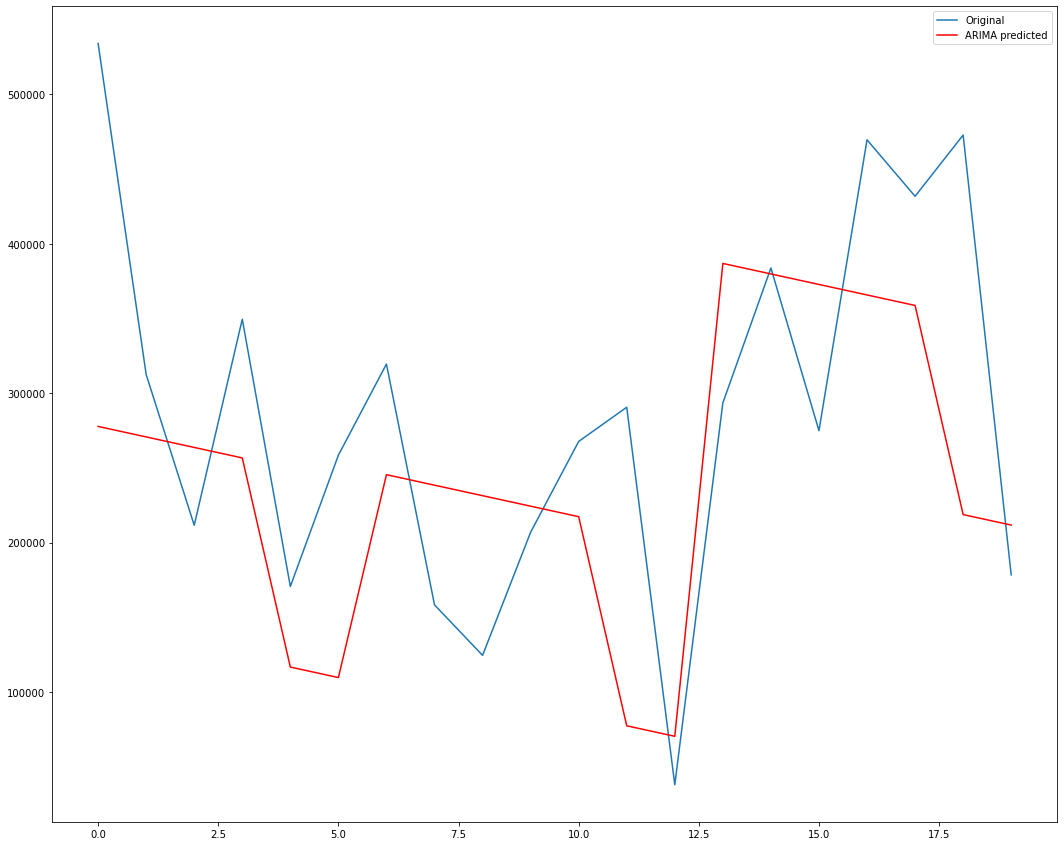

In [86]:
for name,model in models:
    reg=model
    reg.fit(x_train, y_train)
    yhat = reg.predict(x_test)
    for i in np.arange(0,len(yhat)):
        if yhat[i] < 0 :
            yhat[i]=0
    from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
    dict2={"r2_score":r2_score(y_test['amount'].values,yhat), "mae":mean_absolute_error(y_test['amount'].values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test['amount'].values,yhat)}
    print(name,dict2)
    from matplotlib import pyplot
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = [18,15]
    plt.plot(y_test['amount'].values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()

## HYPER PARAMTER TUNING

In [87]:
x_train

,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,
2020-01-01,1.0,2,1,1,2020,1,1,1.0
2020-01-02,1.0,3,1,1,2020,2,1,1.0
2020-01-03,0.0,4,1,1,2020,3,1,1.0
2020-01-04,0.0,5,1,1,2020,4,1,0.0
2020-01-05,0.0,6,1,1,2020,5,1,0.0
...,...,...,...,...,...,...,...,...
2021-02-11,0.0,3,1,2,2021,11,6,1.0
2021-02-12,0.0,4,1,2,2021,12,6,1.0
2021-02-13,0.0,5,1,2,2021,13,6,0.0


In [88]:
import numpy as np
k_values = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36])
max_depth=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_leaf=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_split=np.array([2,4,6,8,10,12,14,1618,20,22])
criteria=np.array(['mse'])
base=np.array(['LinearRegression()'])#,'RandomForestRegressor()','DecisionTreeRegressor()','KNeighborsRegressor()'])
n_estimator=np.array([500,1000])
param_gridknn = dict(n_neighbors=k_values)
param_griddt=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,criterion=criteria,min_samples_split=min_samples_split,)
param_gridxgb=dict(n_estimator=n_estimator)
param_gridgb=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf)#,min_samples_split=min_samples_split)
param_gridada=dict(base_estimator=base)

In [89]:
x_train

,hol,dayofweek,quarter,month,year,dayofmonth,weekofyear,Weekday
date,,,,,,,,
2020-01-01,1.0,2,1,1,2020,1,1,1.0
2020-01-02,1.0,3,1,1,2020,2,1,1.0
2020-01-03,0.0,4,1,1,2020,3,1,1.0
2020-01-04,0.0,5,1,1,2020,4,1,0.0
2020-01-05,0.0,6,1,1,2020,5,1,0.0
...,...,...,...,...,...,...,...,...
2021-02-11,0.0,3,1,2,2021,11,6,1.0
2021-02-12,0.0,4,1,2,2021,12,6,1.0
2021-02-13,0.0,5,1,2,2021,13,6,0.0


[20:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


KNeighborsRegressor(metric='manhattan', n_neighbors=24) {'r2_score': -0.09843285391908885, 'mae': 102562.29166666666, 'mse': 16955496858.506943, 'mape': 69.25282105735559}


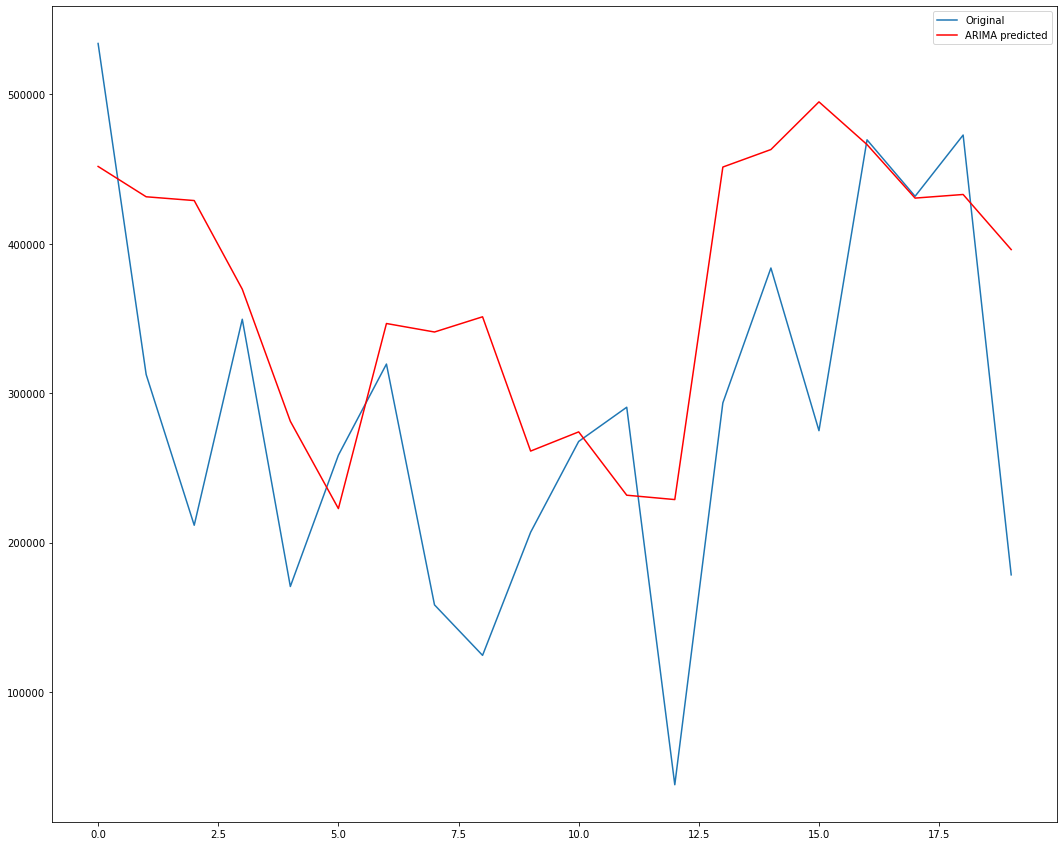

In [90]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
k_values = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36])
metric=np.array(['euclidean','manhattan','minkowski'])
max_depth=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_leaf=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_split=np.array([2,4,6,8,10,12,14,1618,20,22])
base=np.array(['LinearRegression()'])#,'RandomForestRegressor()','DecisionTreeRegressor()','KNeighborsRegressor()'])
n_estimator=np.array([500,1000])
param_gridknn = dict(n_neighbors=k_values,metric=metric)
param_griddt=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,)
param_gridxgb=dict(n_estimator=n_estimator)
param_gridgb=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
param_gridada=dict(base_estimator=base)
modelling=[]
params=[]
score=[]
num_folds=10
seed=10
scoring='neg_mean_absolute_error'

model=LinearRegression()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('LR')

model=Lasso()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('LA')

model=xgb.XGBRFRegressor(n_estimator=500)
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('XBG')


model=AdaBoostRegressor()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('AB')

model=KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_gridknn,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('KNN')

model=DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_griddt,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('DT')


model=RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_griddt,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('RF')

model=GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_gridgb,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('GB')

res=pd.DataFrame()
res['model']=modelling
res['res']=score
res['params']=params



XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) {'r2_score': 0.1966169544574723, 'mae': 92086.2970703125, 'mse': 12401084559.946579, 'mape': 79.2851712912652}


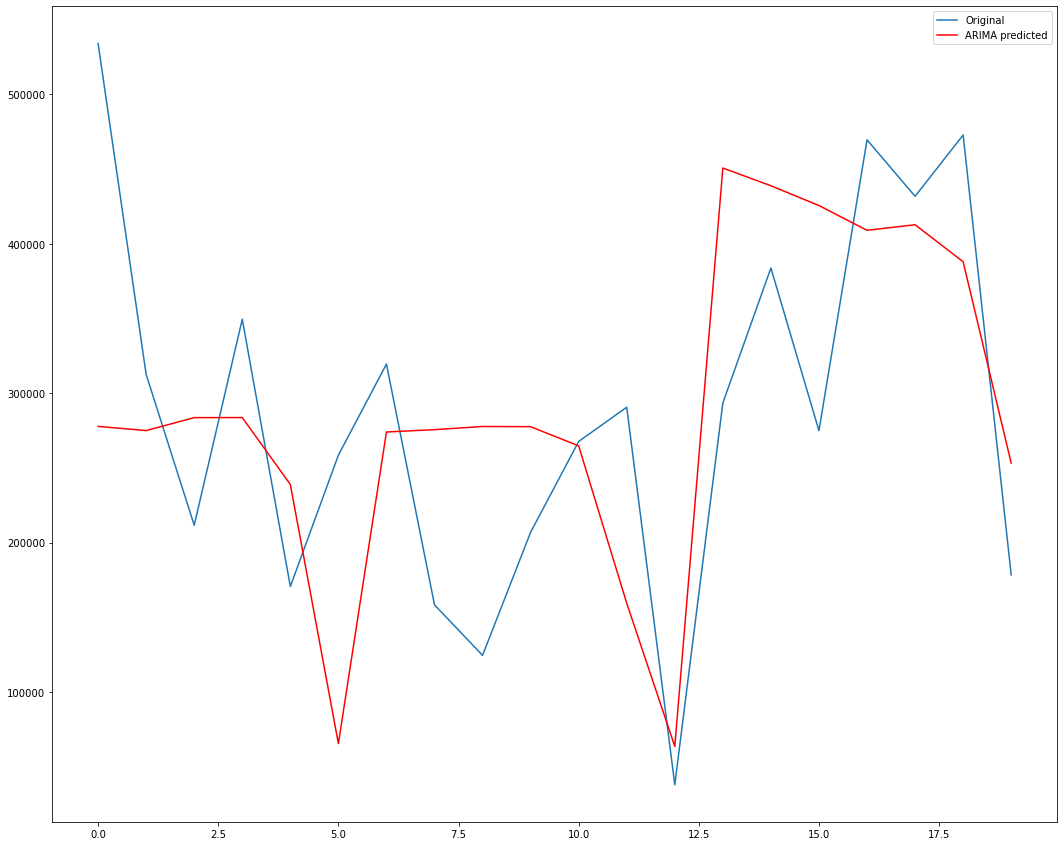

In [97]:
res['res']=abs(res['res'])
res=res.sort_values(['res'])
res.reset_index(drop=True,inplace=True)
#md=res['model'][0]

if res['model'][0]=='DT':
    model=DecisionTreeRegressor()
    str11=res['params'][0]
    model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    

elif res['model'][0]=='RF':
    model=RandomForestRegressor()
    str11=res['params'][0]
    model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
    
elif res['model'][0]=='GB':
    model=GradientBoostingRegressor()
    str11=res['params'][0]
    model.set_params(max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test.values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
    
elif res['model'][0]=='KNN':
    model=KNeighborsRegressor()
    str11=res['params'][0]
    model.set_params(n_neighbors=str11['n_neighbors'],metric=str11['metric'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test.values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
elif res['model'][0]=='LR':
    model=LinearRegression()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()    
    
elif res['model'][0]=='LA':
    model=Lasso()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show() 
    
elif res['model'][0]=='AB':
    model=AdaBoostRegressor()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()   
    
elif res['model'][0]=='XBG':
    model=xgb.XGBRFRegressor()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show() 
    

## SCALED DATA

In [98]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)


X=StandardScaler().fit_transform(X)

[09:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=12, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None) {'r2_score': 0.193536724745611, 'mae': 92001.340234375, 'mse':

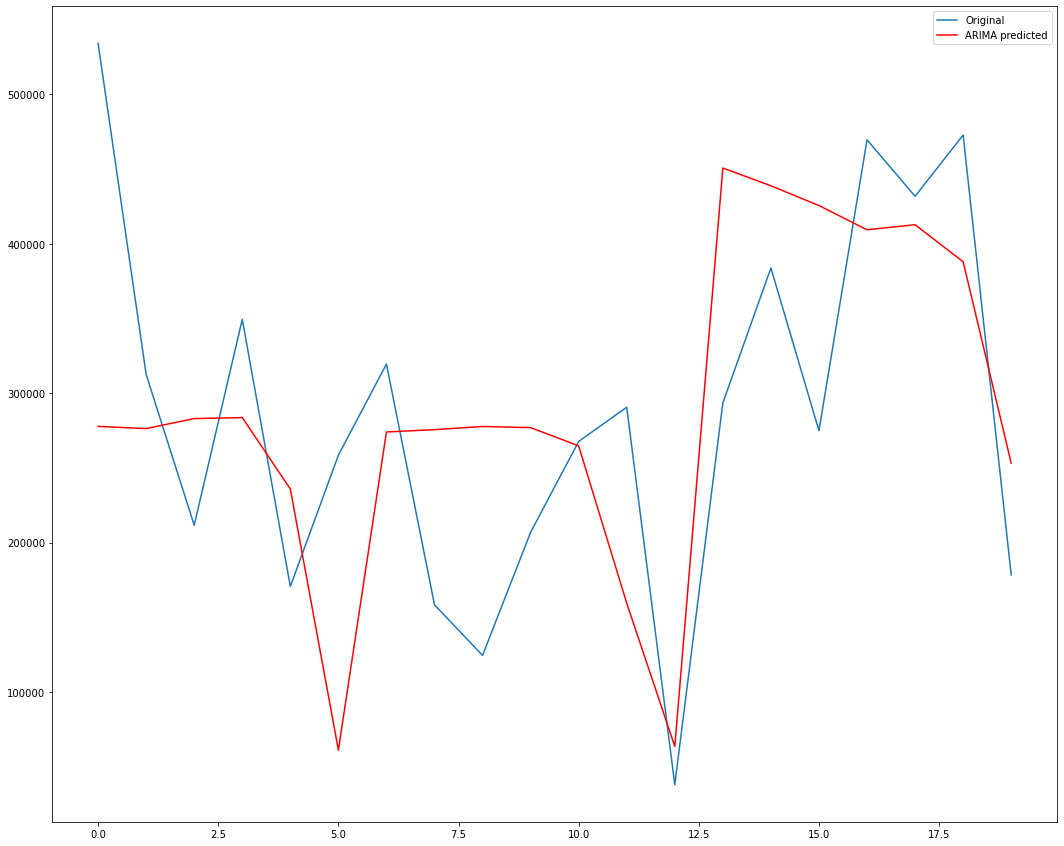

In [99]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
k_values = np.array([2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36])
metric=np.array(['euclidean','manhattan','minkowski'])
max_depth=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_leaf=np.array([2,4,6,8,10,12,14,1618,20,22])
min_samples_split=np.array([2,4,6,8,10,12,14,1618,20,22])
base=np.array(['LinearRegression()'])#,'RandomForestRegressor()','DecisionTreeRegressor()','KNeighborsRegressor()'])
n_estimator=np.array([500,1000])
param_gridknn = dict(n_neighbors=k_values,metric=metric)
param_griddt=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split,)
param_gridxgb=dict(n_estimator=n_estimator)
param_gridgb=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
param_gridada=dict(base_estimator=base)
modelling=[]
params=[]
score=[]
num_folds=10
seed=10
scoring='neg_mean_absolute_error'

model=LinearRegression()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('LR')

model=Lasso()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('LA')

model=xgb.XGBRFRegressor(n_estimator=500)
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('XBG')


model=AdaBoostRegressor()
model.fit(X,Y)
pred=model.predict(X)
score.append(mean_absolute_error(Y,pred))
params.append("null")
modelling.append('AB')

model=KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_gridknn,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('KNN')

model=DecisionTreeRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_griddt,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('DT')


model=RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_griddt,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('RF')

model=GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_gridgb,cv=kfold,scoring=scoring)
grid_result = grid.fit(X, Y)
#print("Best: %f using %s for %s" % (grid_result.best_score_, grid_result.best_params_,name))
score.append(int(grid_result.best_score_))
params.append(grid_result.best_params_)
modelling.append('GB')

res=pd.DataFrame()
res['model']=modelling
res['res']=score
res['params']=params

res['res']=abs(res['res'])
res=res.sort_values(['res'])
res.reset_index(drop=True,inplace=True)
#md=res['model'][0]

if res['model'][0]=='DT':
    model=DecisionTreeRegressor()
    str11=res['params'][0]
    model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    

elif res['model'][0]=='RF':
    model=RandomForestRegressor()
    str11=res['params'][0]
    model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
    
elif res['model'][0]=='GB':
    model=GradientBoostingRegressor()
    str11=res['params'][0]
    model.set_params(max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test.values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
    
elif res['model'][0]=='KNN':
    model=KNeighborsRegressor()
    str11=res['params'][0]
    model.set_params(n_neighbors=str11['n_neighbors'],metric=str11['metric'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test.values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()
    
elif res['model'][0]=='LR':
    model=LinearRegression()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()    
    
elif res['model'][0]=='LA':
    model=Lasso()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show() 
    
elif res['model'][0]=='AB':
    model=AdaBoostRegressor()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()   
    
elif res['model'][0]=='XBG':
    model=xgb.XGBRFRegressor()
    #str11=res['params'][0]
    #model.set_params(criterion=params['criterion'],max_depth=str11['max_depth'],min_samples_leaf=str11['min_samples_leaf'],min_samples_split=str11['min_samples_split'])
    model.fit(x_train,y_train)
    yhat=model.predict(x_test)
    dict2={"r2_score":r2_score(y_test.values,yhat), "mae":mean_absolute_error(y_test.values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test.values,yhat)}
    print(model,dict2)
    plt.plot(y_test.values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show() 
    

LR {'r2_score': 0.16478733636764697, 'mae': 68861.89424978045, 'mse': 8446247664.902111, 'mape': 163.572571449049}


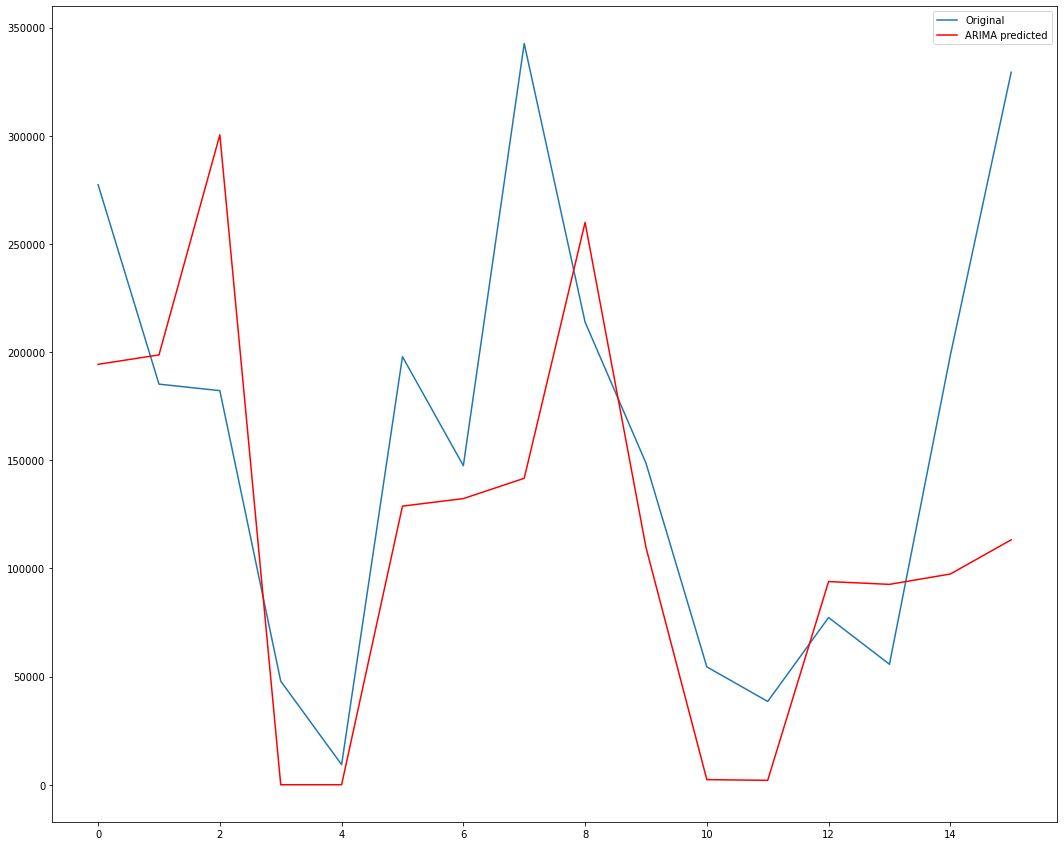

KNN {'r2_score': 0.17776229848300473, 'mae': 76163.02083333333, 'mse': 8315035881.076389, 'mape': 219.74787646881512}


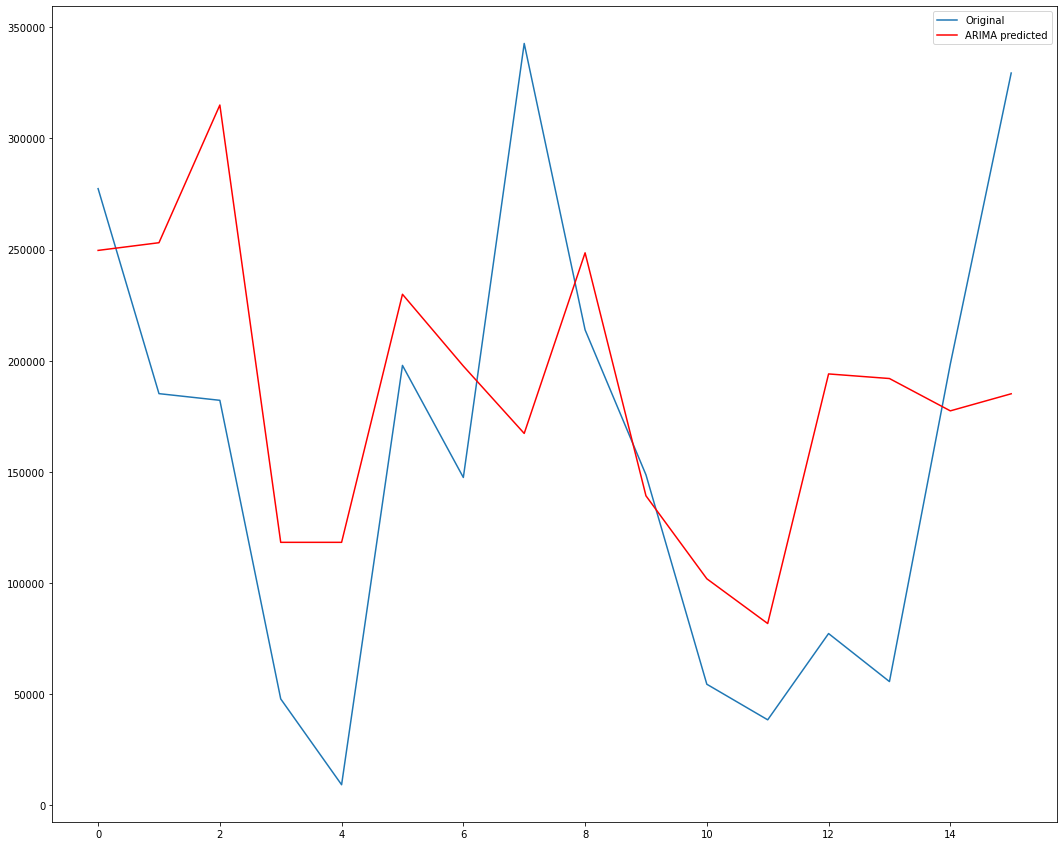

CART {'r2_score': 0.554718195169005, 'mae': 55384.013480392154, 'mse': 4502997341.923329, 'mape': 85.16774671545883}


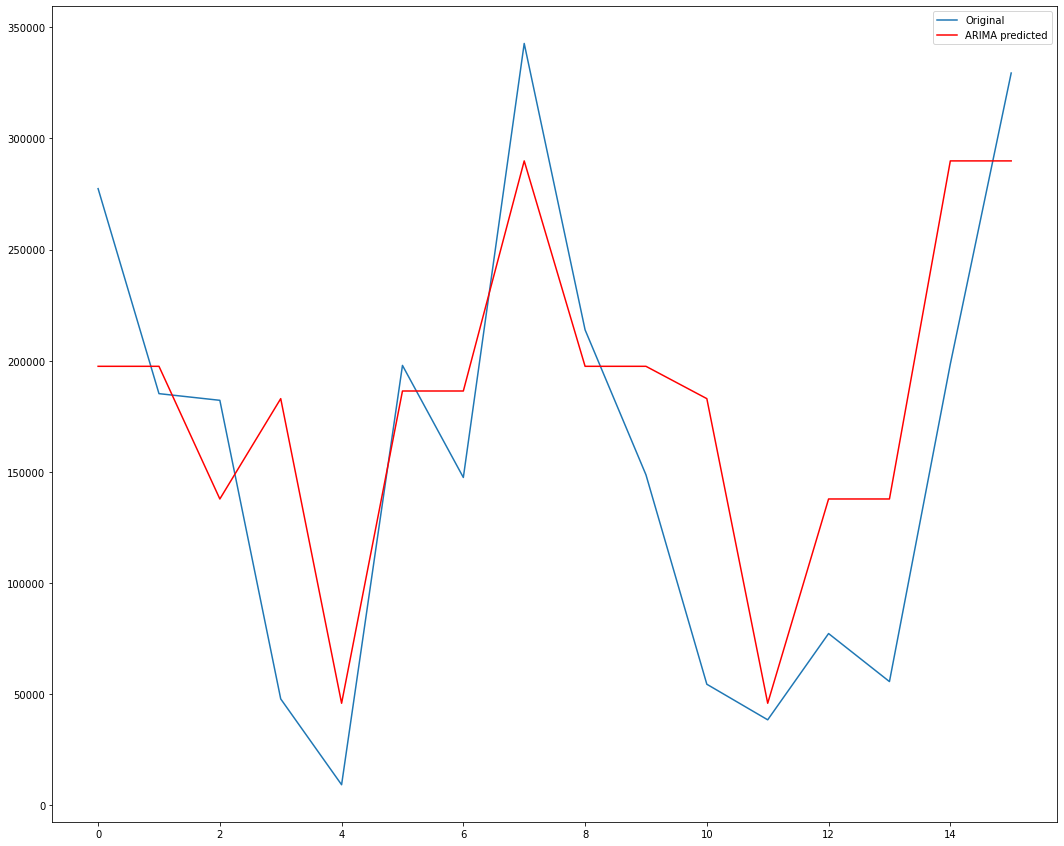

RF {'r2_score': 0.3119777120418954, 'mae': 67133.28828690204, 'mse': 6957756863.735422, 'mape': 117.7662078830325}


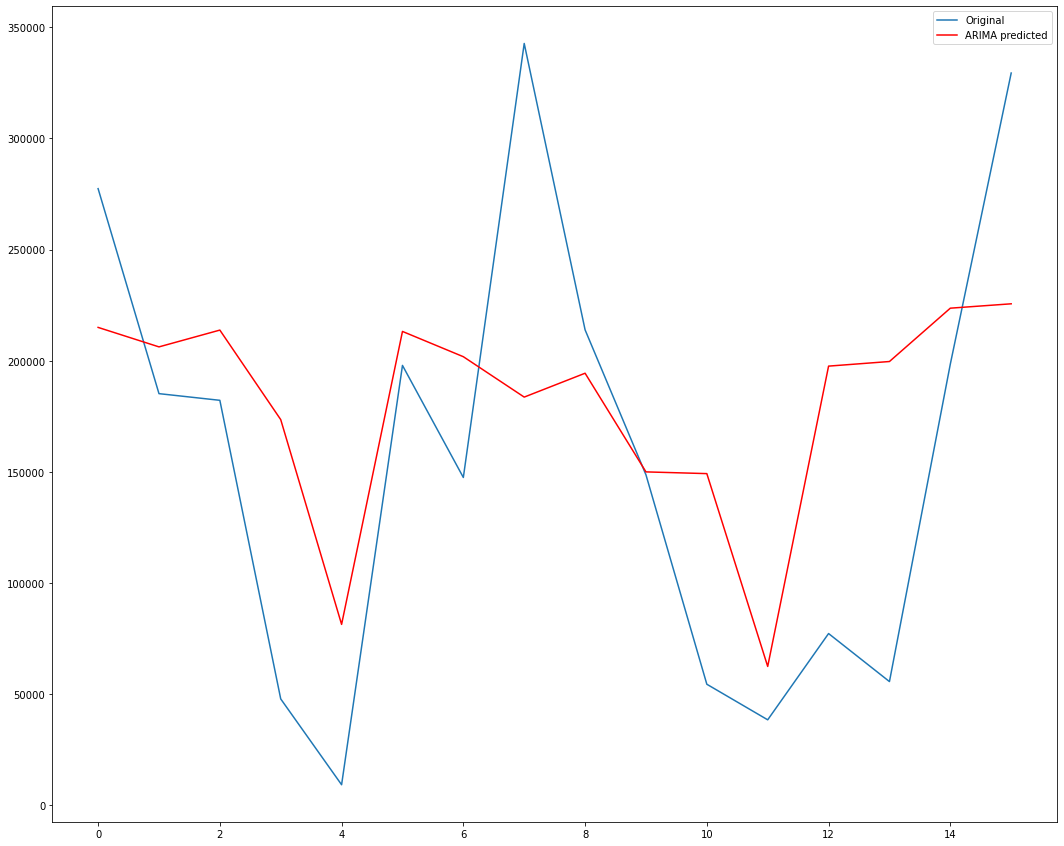

xgb {'r2_score': 0.019706424845378212, 'mae': 84126.33544921875, 'mse': 9913406106.72649, 'mape': 155.53751149095046}


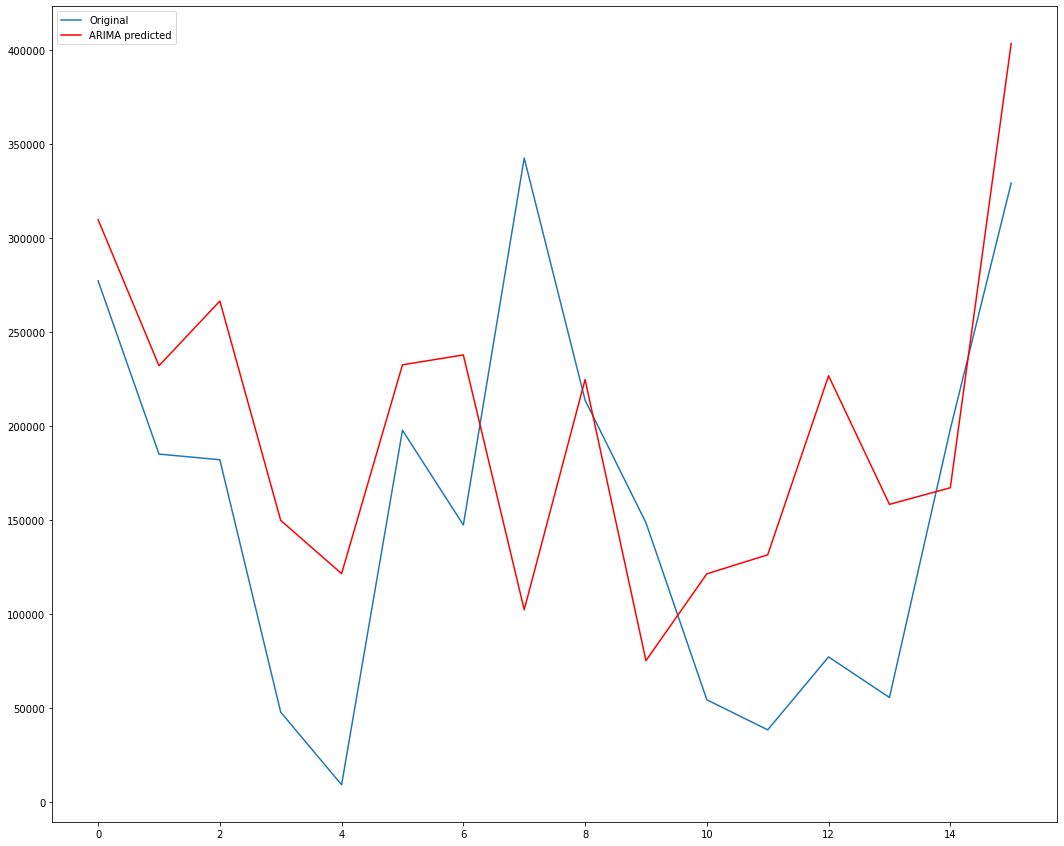

GB {'r2_score': -0.2531189111571097, 'mae': 88752.45844090101, 'mse': 12672404452.2682, 'mape': 241.9220142893696}


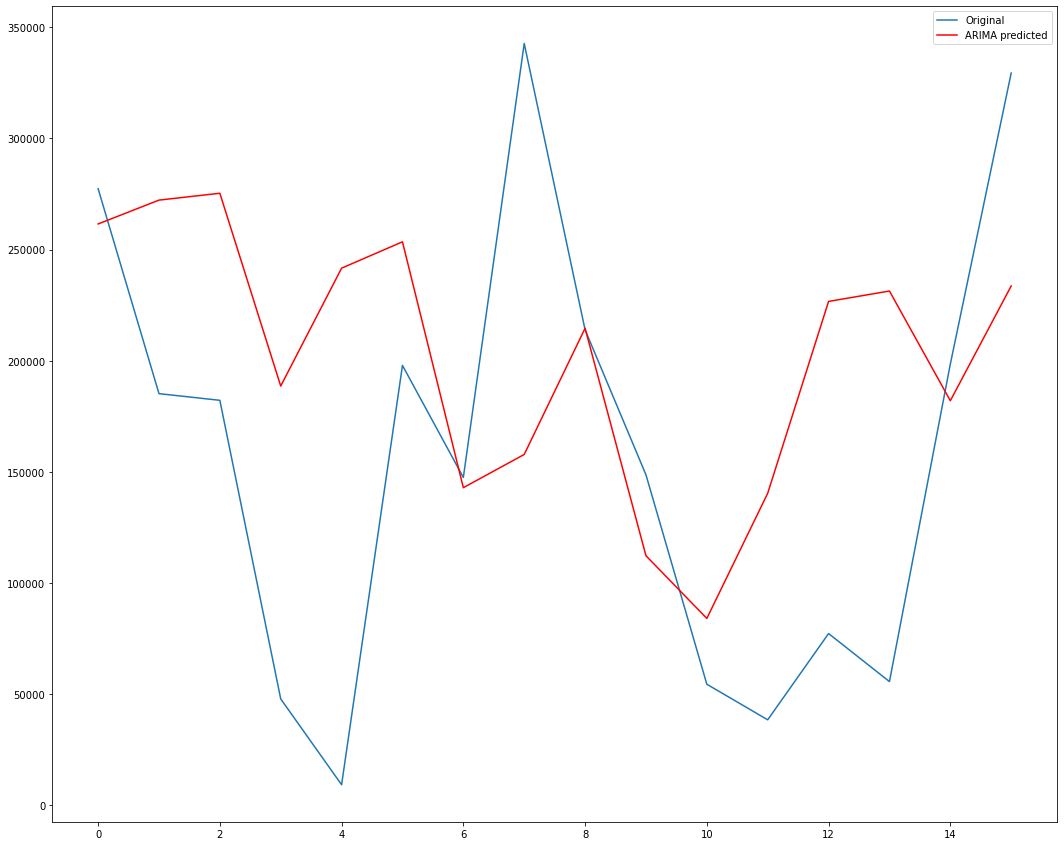

abr {'r2_score': -0.24749565534858076, 'mae': 80981.2011335411, 'mse': 12615538203.335411, 'mape': 57.14696894630116}


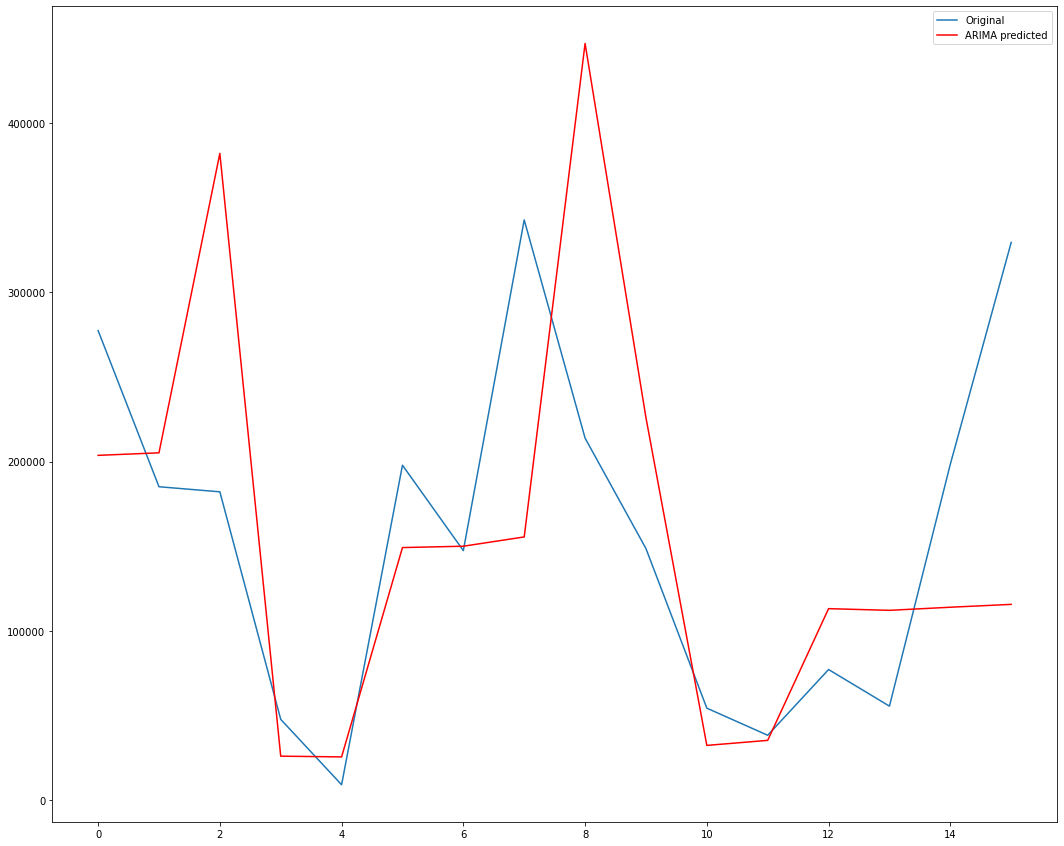

la {'r2_score': 0.13924342798793155, 'mae': 69476.82217370163, 'mse': 8704565319.673225, 'mape': 49.82701794927493}


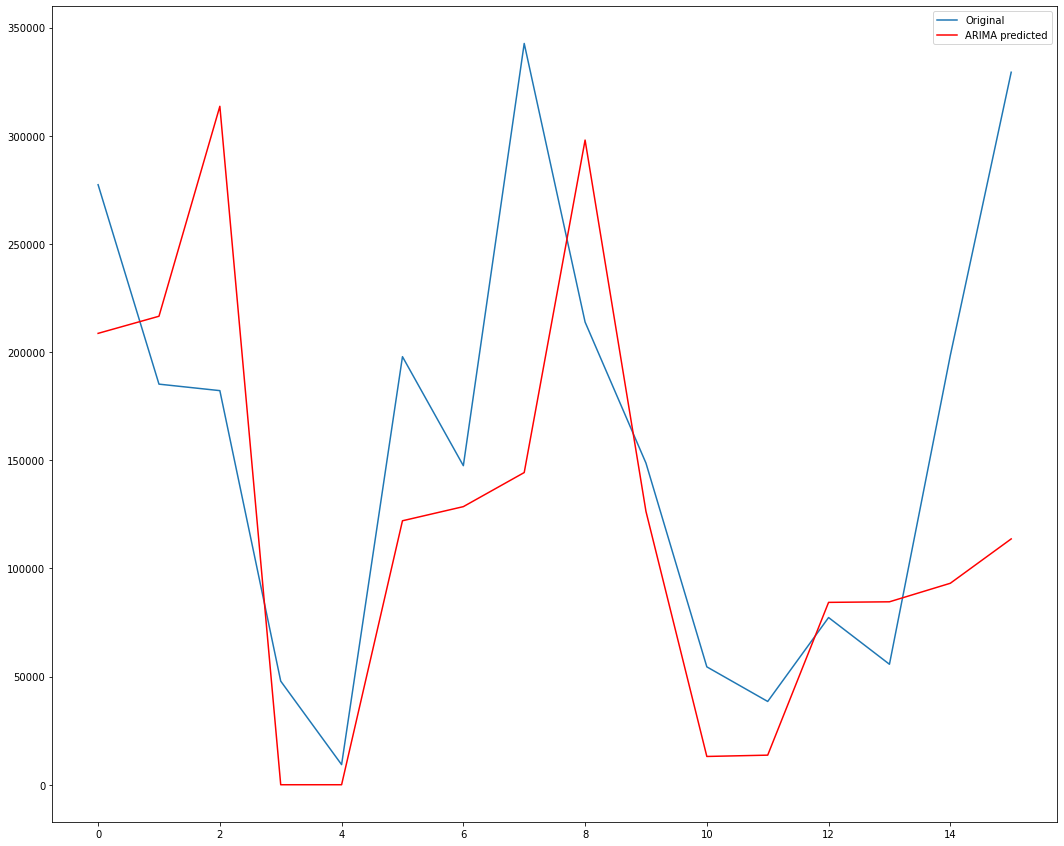

In [227]:
for name,model in models:
    reg=model
    reg.fit(x_train, y_train)
    yhat = reg.predict(x_test)
    for i in np.arange(0,len(yhat)):
        if yhat[i] < 0 :
            yhat[i]=0
    from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
    dict2={"r2_score":r2_score(y_test['amount'].values,yhat), "mae":mean_absolute_error(y_test['amount'].values,yhat),"mse":mean_squared_error(y_test['amount'].values,yhat) ,"mape":mean_absolute_percentage_error(y_test['amount'].values,yhat)}
    print(name,dict2)
    from matplotlib import pyplot
    import matplotlib.pyplot as plt
    import matplotlib
    matplotlib.rcParams['figure.figsize'] = [18,15]
    plt.plot(y_test['amount'].values , label='Original')
    plt.plot(yhat,color='red',label='ARIMA predicted')
    plt.legend()
    plt.show()